In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [46]:
path = 'new_data.csv'

In [48]:
train_data = pd.read_csv(path)

In [50]:
train_data.sample(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206208,146315,Indigo,6E-563,Kolkata,Morning,one,Afternoon,Hyderabad,Economy,5.08,35,4148
65236,213557,Vistara,UK-995,Delhi,Morning,one,Evening,Bangalore,Business,8.92,21,54777
263023,87309,Vistara,UK-816,Bangalore,Morning,zero,Afternoon,Delhi,Economy,2.67,18,4502


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [54]:
train_data.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [56]:
train_data['airline'].unique()

array(['Vistara', 'Air_India', 'Indigo', 'GO_FIRST', 'AirAsia',
       'SpiceJet'], dtype=object)

In [58]:
train_data['source_city'].nunique()

6

In [60]:
train_data['flight'].nunique()

1561

In [62]:
train_data['stops'].unique()

array(['one', 'zero', 'two_or_more'], dtype=object)

In [63]:
train_data['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'Kolkata', 'Delhi'],
      dtype=object)

In [65]:
train_data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [67]:
airline_count = train_data['airline'].value_counts()
print(airline_count)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


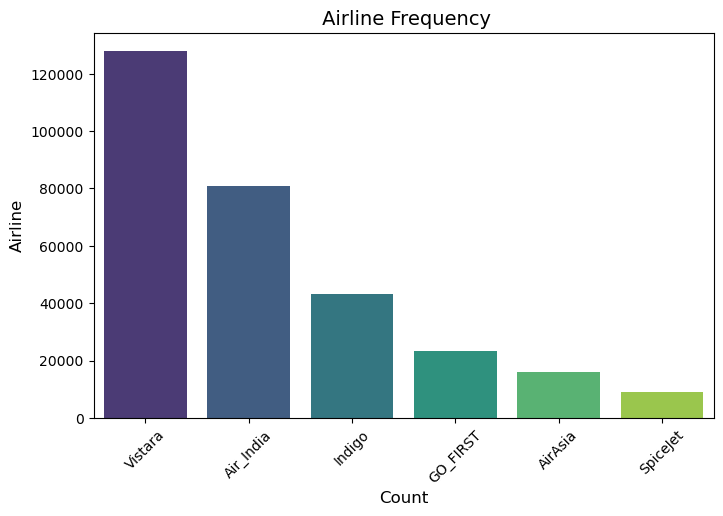

In [68]:
plt.figure(figsize = (8, 5))
sns.countplot(data = train_data, x = 'airline', order = airline_count.index, palette = 'viridis')
plt.title(' Airline Frequency', fontsize = 14)
plt.xticks(rotation = 45)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Airline', fontsize =12)
plt.show()

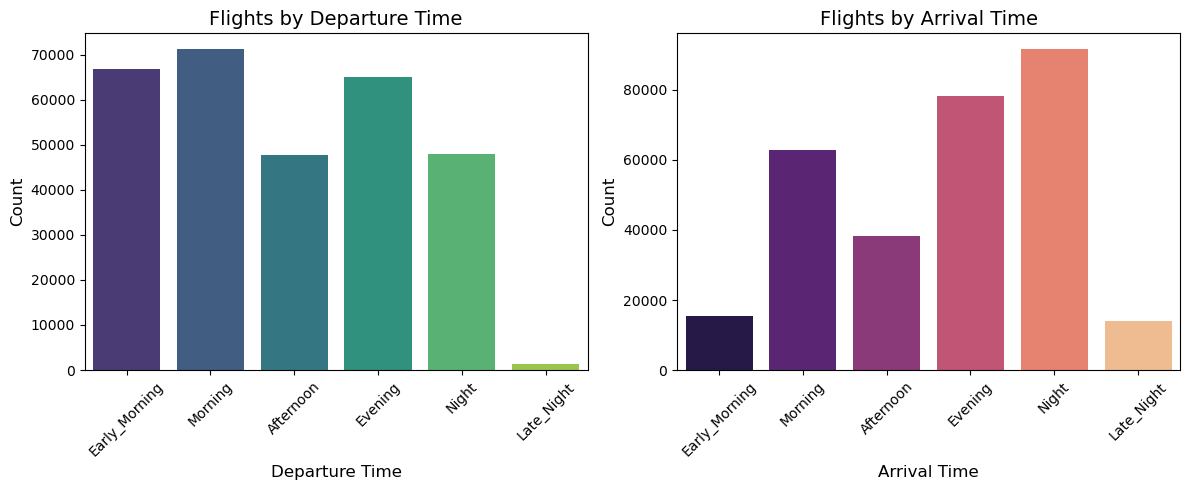

In [70]:
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=train_data, x='departure_time', palette='viridis', order = time_order)
plt.title("Flights by Departure Time", fontsize = 14)
plt.xlabel('Departure Time', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.countplot(data=train_data, x='arrival_time', palette='magma', order = time_order)
plt.title("Flights by Arrival Time", fontsize = 14)
plt.xlabel('Arrival Time', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

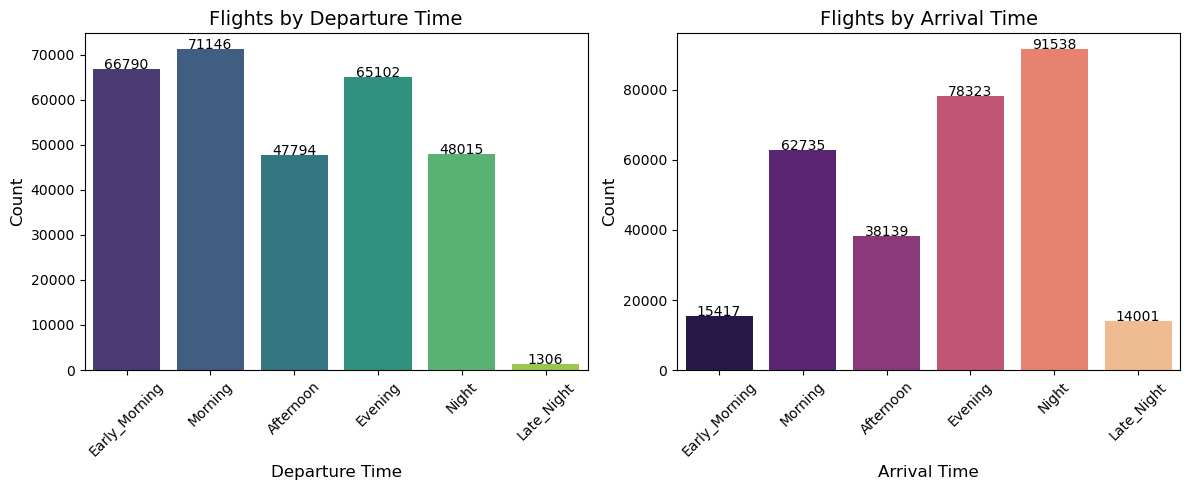

In [72]:
# Define logical order for time categories (if your dataset uses these labels)
time_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]

plt.figure(figsize=(12,5))

# Departure time
plt.subplot(1,2,1)
sns.countplot(
    data=train_data,
    x='departure_time',
    palette='viridis',
    order=time_order  # enforce logical order
)
plt.title("Flights by Departure Time", fontsize=14)
plt.xlabel('Departure Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, 
                   p.get_height() + 5,  # a little above bar
                   int(p.get_height()), 
                   ha='center', fontsize=10)

# Arrival time
plt.subplot(1,2,2)
sns.countplot(
    data=train_data,
    x='arrival_time',
    palette='magma',
    order=time_order
)
plt.title("Flights by Arrival Time", fontsize=14)
plt.xlabel('Arrival Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, 
                   p.get_height() + 5, 
                   int(p.get_height()), 
                   ha='center', fontsize=10)

plt.tight_layout()
plt.show()

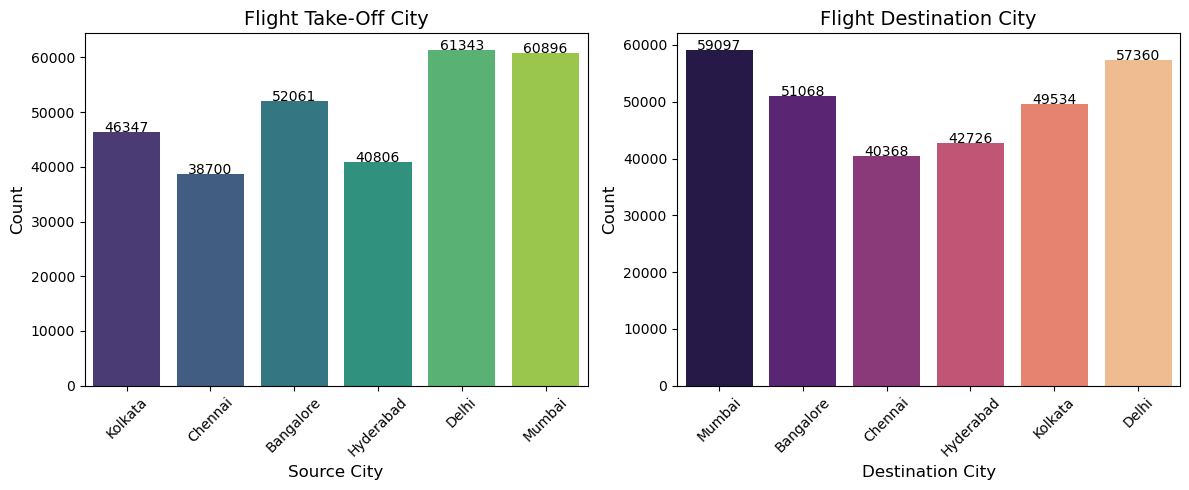

In [73]:
plt.figure(figsize=(12,5))

# Departure time
plt.subplot(1,2,1)
sns.countplot(
    data=train_data,
    x='source_city',
    palette='viridis'
    )
plt.title("Flight Take-Off City", fontsize=14)
plt.xlabel('Source City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, 
                   p.get_height() + 5,  # a little above bar
                   int(p.get_height()), 
                   ha='center', fontsize=10)

# Arrival time
plt.subplot(1,2,2)
sns.countplot(
    data=train_data,
    x='destination_city',
    palette='magma'
)
plt.title("Flight Destination City", fontsize=14)
plt.xlabel('Destination City', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add labels above bars
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, 
                   p.get_height() + 5, 
                   int(p.get_height()), 
                   ha='center', fontsize=10)

plt.tight_layout()
plt.show()

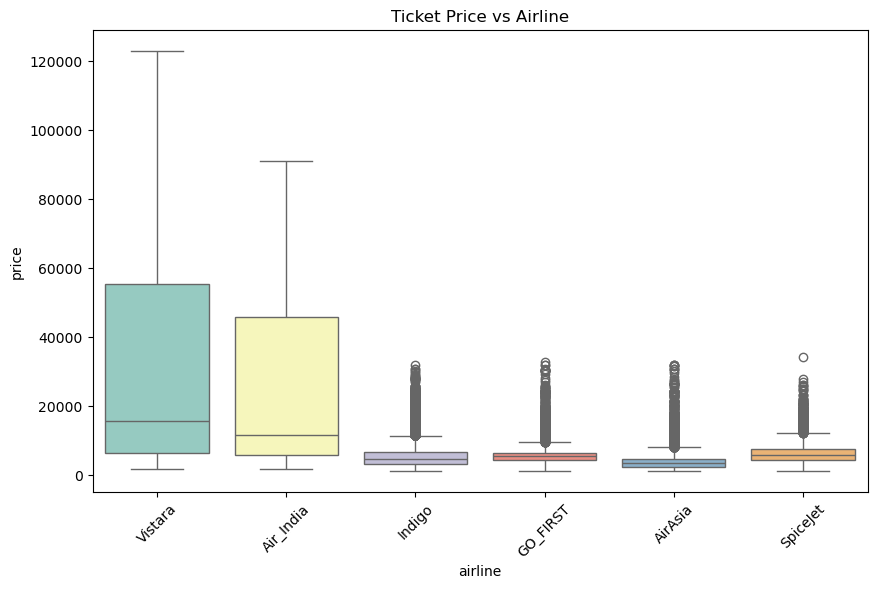

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_data, x='airline', y='price', palette='Set3')
plt.title("Ticket Price vs Airline")
plt.xticks(rotation=45)

plt.savefig("Ticket price vs airline", dpi=300, bbox_inches="tight")  # Saves as a high-resolution image
plt.show()

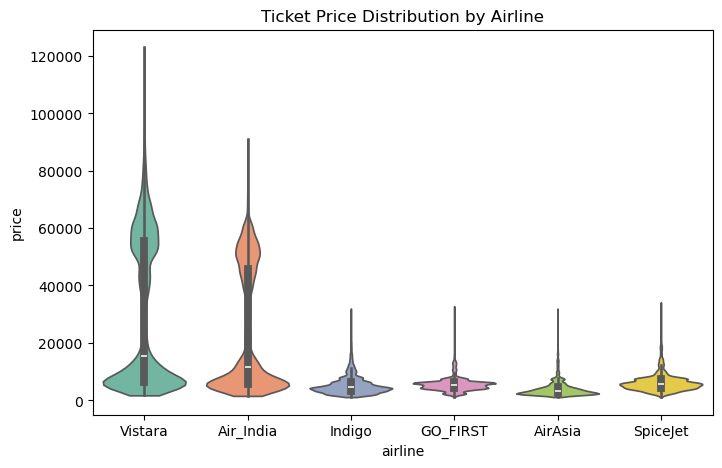

In [75]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=train_data, x='airline', y='price', palette='Set2', cut=0)
plt.title("Ticket Price Distribution by Airline")
plt.show()

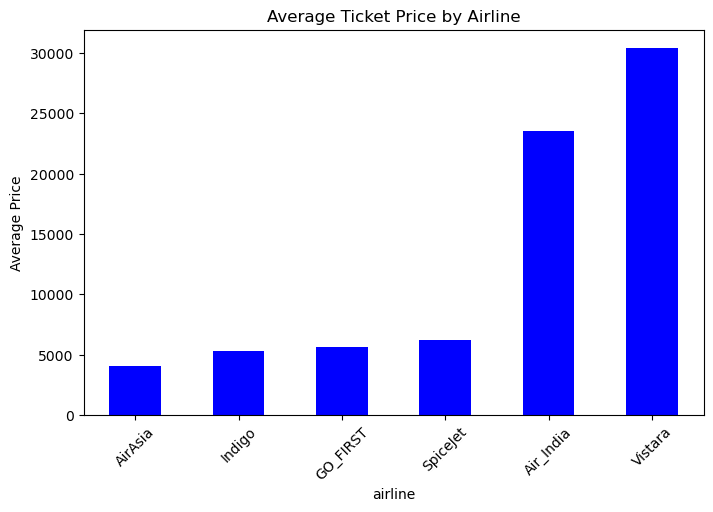

In [76]:
avg_price = train_data.groupby('airline')['price'].mean().sort_values()
avg_price.plot(kind='bar', figsize=(8, 5), color = 'blue')
plt.title("Average Ticket Price by Airline")
plt.ylabel("Average Price")
plt.xticks(rotation = 45)
plt.show()

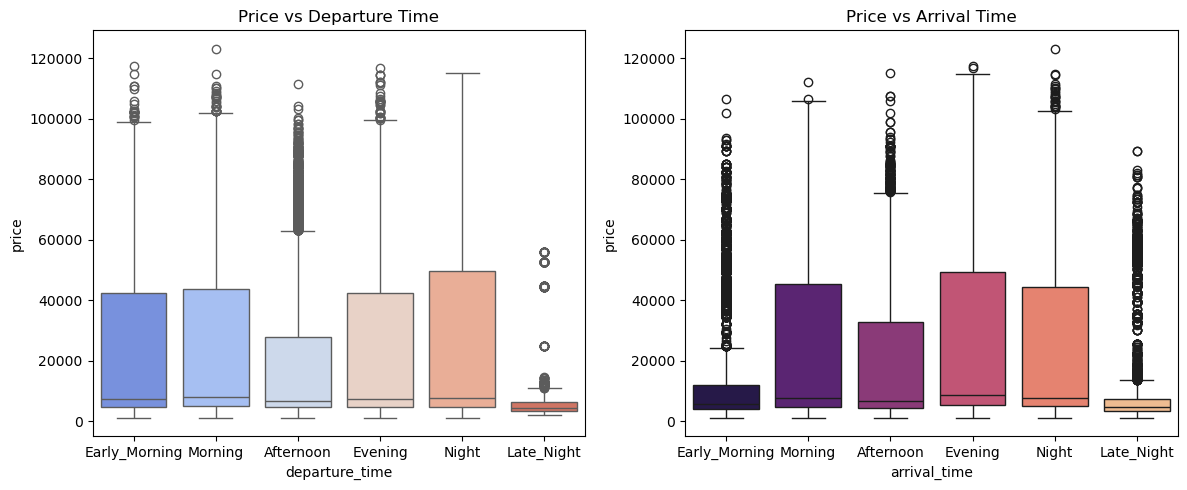

In [77]:
time_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=train_data, x='departure_time', y='price', palette='coolwarm', order = time_order)
plt.title("Price vs Departure Time")

plt.subplot(1,2,2)
sns.boxplot(data=train_data, x='arrival_time', y='price', palette='magma', order = time_order)
plt.title("Price vs Arrival Time")

plt.tight_layout()
plt.show()

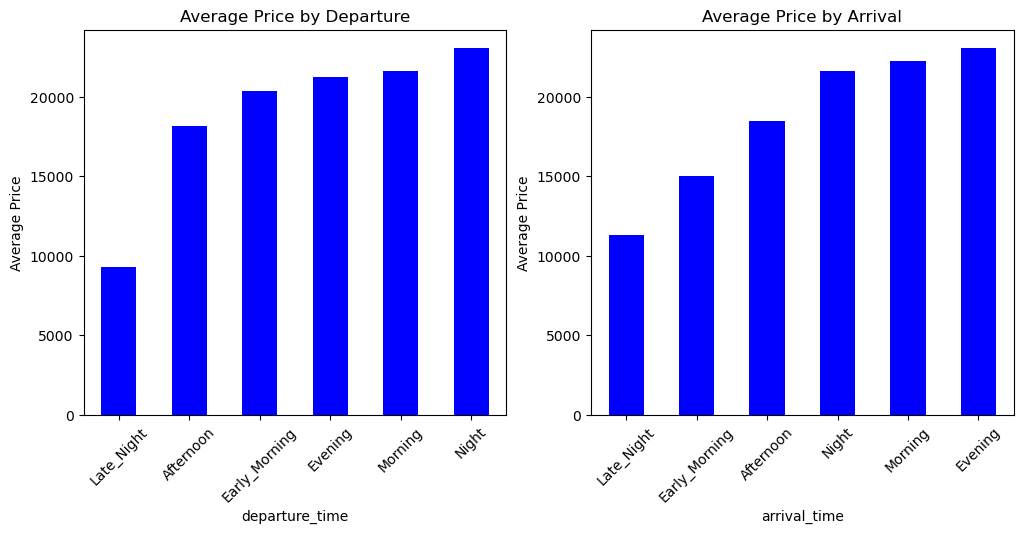

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
avg_price_dp = train_data.groupby('departure_time')['price'].mean().sort_values()
avg_price_dp.plot(kind='bar', color = 'blue')
plt.title("Average Price by Departure")
plt.ylabel("Average Price")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
avg_price_ar = train_data.groupby('arrival_time')['price'].mean().sort_values()
avg_price_ar.plot(kind='bar', color = 'blue')
plt.title("Average Price by Arrival")
plt.ylabel("Average Price")
plt.xticks(rotation = 45)
plt.show()

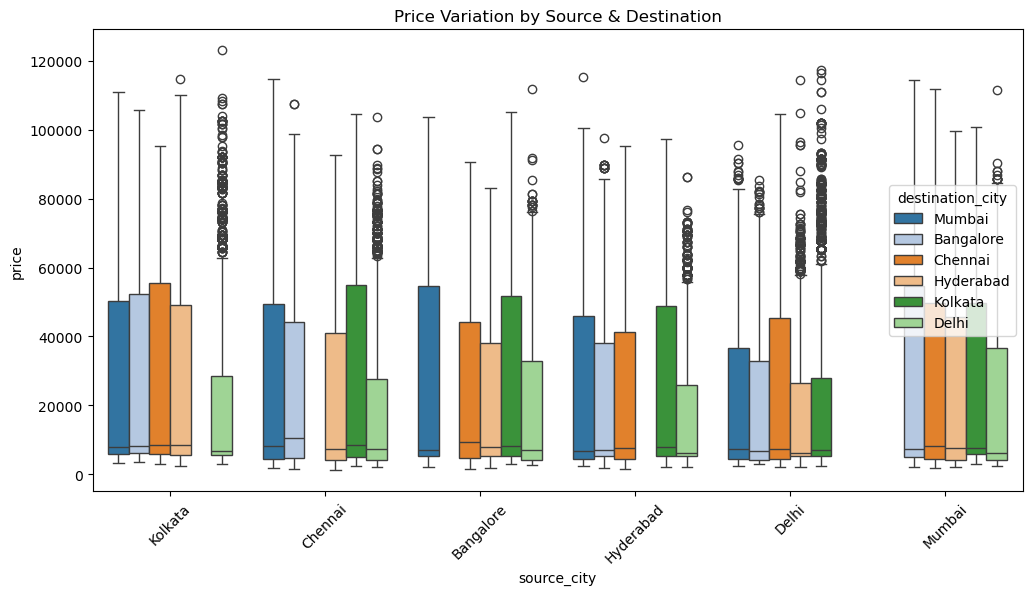

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data, x='source_city', y='price', hue='destination_city', palette='tab20')
plt.title("Price Variation by Source & Destination")
plt.xticks(rotation=45)
plt.savefig("Price Variation by Source & Destination", dpi=300, bbox_inches="tight")  # Saves as a high-resolution image

plt.show()

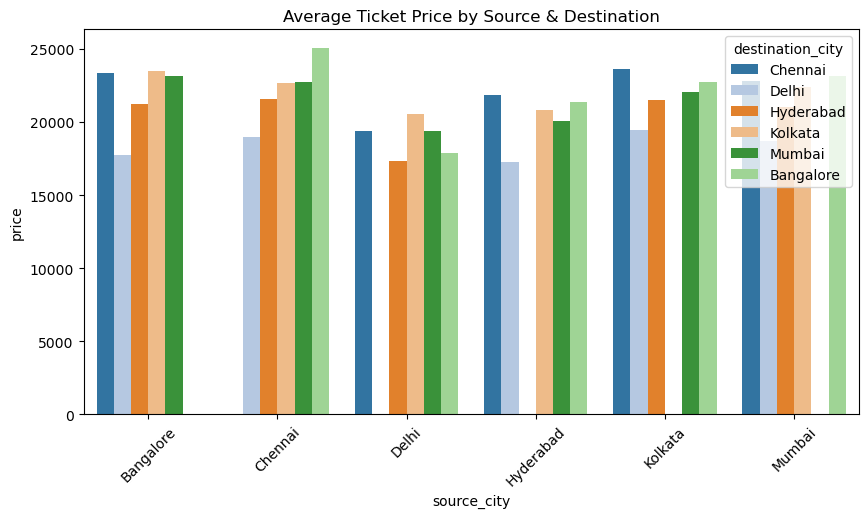

In [80]:
avg_price = train_data.groupby(['source_city','destination_city'])['price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=avg_price, x='source_city', y='price', hue='destination_city', palette='tab20')
plt.title("Average Ticket Price by Source & Destination")
plt.xticks(rotation=45)
plt.show()

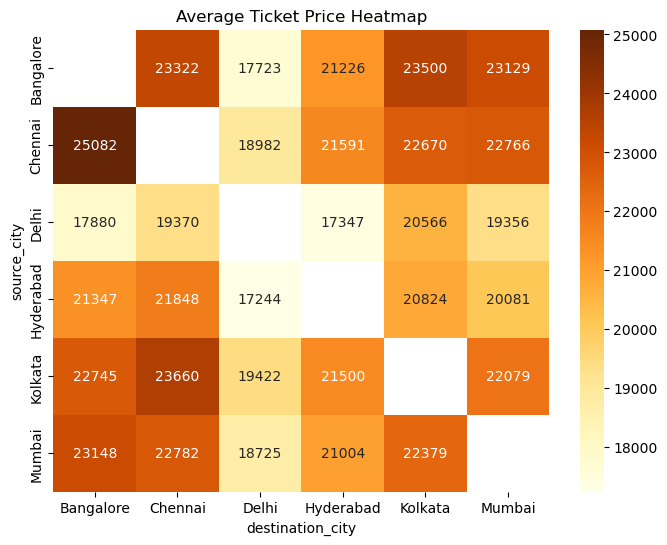

In [81]:
pivot_table = train_data.pivot_table(values='price', index='source_city', columns='destination_city', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Average Ticket Price Heatmap")
plt.show()

In [83]:
train_data.sample(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
148504,28628,Air_India,AI-542,Delhi,Morning,one,Morning,Kolkata,Economy,22.33,49,3610
180603,172855,Air_India,AI-559,Hyderabad,Early_Morning,one,Night,Kolkata,Economy,15.83,21,5209
269207,218709,Vistara,UK-705,Delhi,Early_Morning,zero,Morning,Kolkata,Business,2.08,44,27976


In [84]:
train_data[train_data['days_left'] == 1].sample(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
128130,238003,Air_India,AI-867,Mumbai,Night,one,Evening,Hyderabad,Business,21.83,1,50810
195885,61593,Indigo,6E-354,Mumbai,Afternoon,one,Evening,Kolkata,Economy,6.50,1,17126
36049,10029,Vistara,UK-951,Delhi,Afternoon,one,Evening,Bangalore,Economy,27.42,1,12728


In [85]:
train_data[train_data['days_left'] == 2].sample(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
30129,115612,Vistara,UK-818,Bangalore,Evening,one,Night,Chennai,Economy,27.08,2,12454
44190,10163,Vistara,UK-953,Delhi,Night,one,Evening,Bangalore,Economy,21.08,2,12728
45851,241546,Vistara,UK-988,Mumbai,Night,one,Evening,Chennai,Business,19.42,2,98972


In [86]:
train_data['days_left'].max()

49

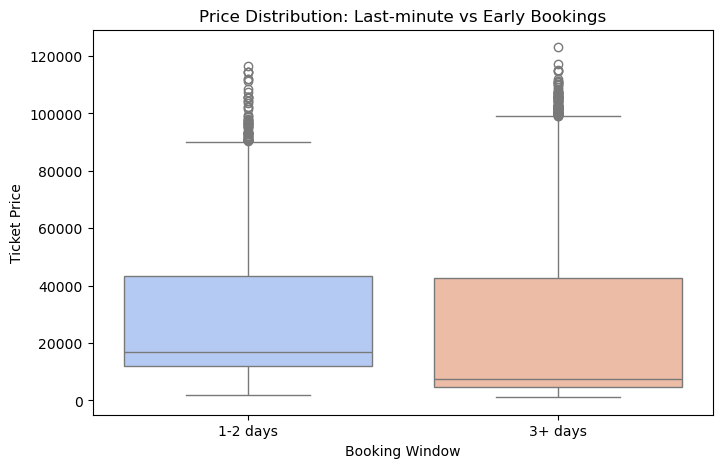

In [87]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_data, x=pd.cut(train_data['days_left'], bins=[0,2,49], labels=['1-2 days','3+ days']),
            y='price', palette='coolwarm')
plt.title("Price Distribution: Last-minute vs Early Bookings")
plt.xlabel("Booking Window")
plt.ylabel("Ticket Price")
plt.show()

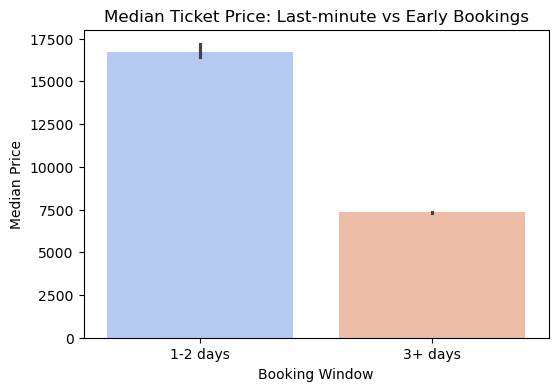

In [88]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=train_data.assign(booking_window=np.where(train_data['days_left']<=2, '1-2 days', '3+ days')),
    x='booking_window',
    y='price',
    palette='coolwarm',
    estimator=np.median
)
plt.title("Median Ticket Price: Last-minute vs Early Bookings")
plt.xlabel("Booking Window")
plt.ylabel("Median Price")
plt.show()

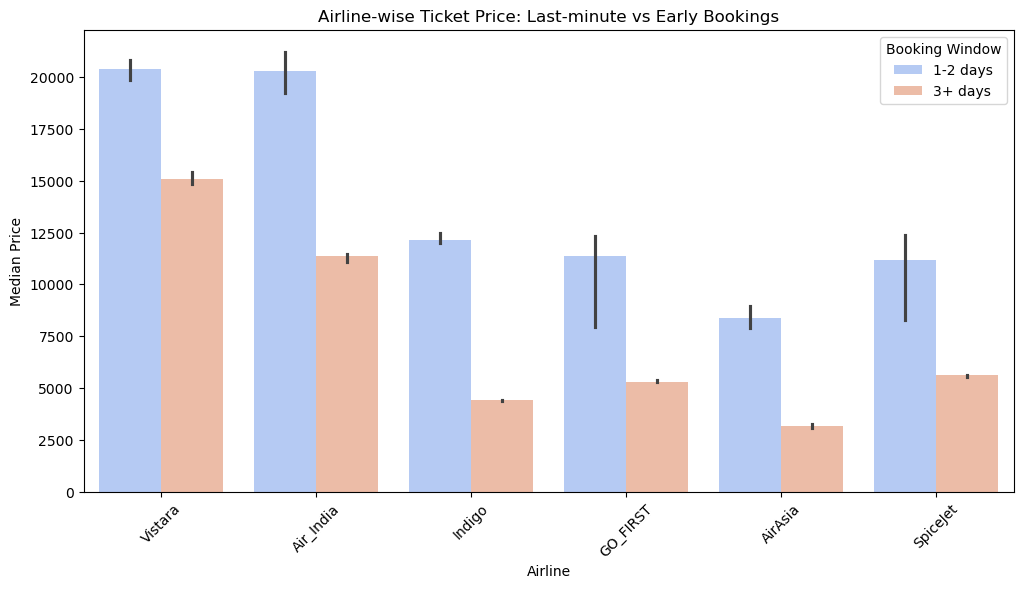

In [89]:
# Create booking window category
train_data['booking_window'] = np.where(train_data['days_left'] <= 2, '1-2 days', '3+ days')

plt.figure(figsize=(12,6))
sns.barplot(
    data=train_data,
    x='airline',
    y='price',
    hue='booking_window',
    estimator=np.median,   # you can switch to np.mean if preferred
    palette='coolwarm'
)
plt.title("Airline-wise Ticket Price: Last-minute vs Early Bookings")
plt.ylabel("Median Price")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title="Booking Window")
plt.show()


In [90]:
last_minute = train_data[train_data['days_left'] <= 2].groupby('airline')['price'].median()
early_booking = train_data[train_data['days_left'] > 2].groupby('airline')['price'].median()

price_increase_ratio = (last_minute / early_booking).sort_values(ascending=False)
print(price_increase_ratio)

airline
Indigo       2.734400
AirAsia      2.643465
GO_FIRST     2.143974
SpiceJet     1.990924
Air_India    1.786494
Vistara      1.350816
Name: price, dtype: float64


In [91]:
train_data['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

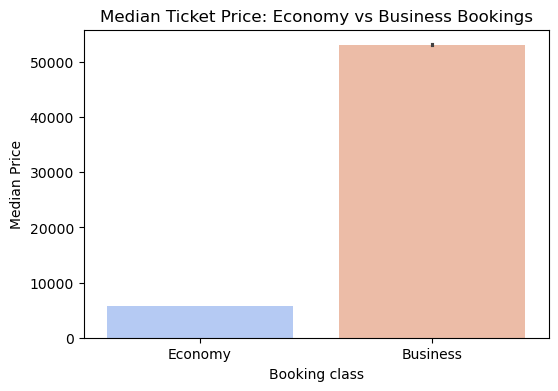

In [92]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=train_data.assign(booking_class=np.where(train_data['class'] == 'Economy', 'Economy', 'Business')),
    x='booking_class',
    y='price',
    palette='coolwarm',
    estimator=np.median
)
plt.title("Median Ticket Price: Economy vs Business Bookings")
plt.xlabel("Booking class")
plt.ylabel("Median Price")
plt.show()

In [93]:
train_data.groupby('class')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


<Axes: xlabel='class', ylabel='price'>

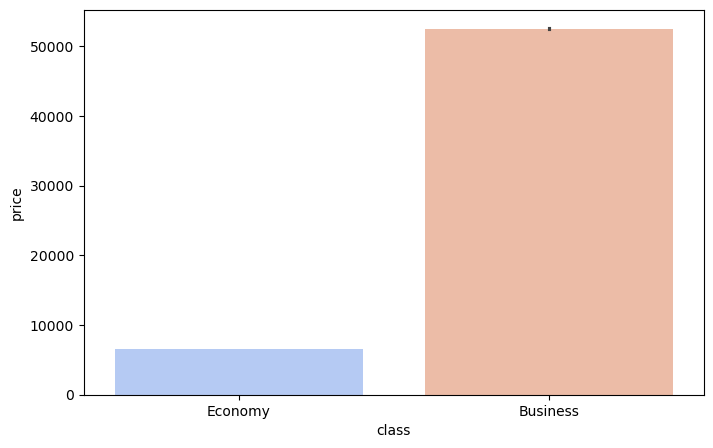

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(data = train_data, x = 'class', y = 'price', palette = 'coolwarm')

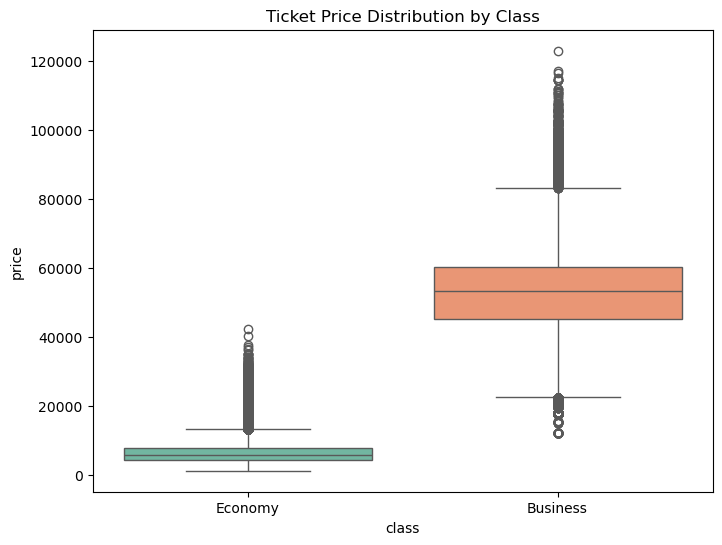

In [95]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_data, x="class", y="price", palette="Set2")
plt.title("Ticket Price Distribution by Class")
plt.show()

In [96]:
avg_price = train_data[
(train_data['airline'] == 'Vistara') &
(train_data['source_city'] == 'Delhi') &
(train_data['destination_city'] == 'Hyderabad') &
(train_data['class'] == 'Business')]['price'].mean()
print(f'Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class is: {avg_price:.2f}')

Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class is: 47939.84


In [97]:
avg_price = train_data[
(train_data['airline'] == 'Vistara') &
(train_data['source_city'] == 'Delhi') &
(train_data['destination_city'] == 'Hyderabad') &
(train_data['class'] == 'Economy')]['price'].mean()
print(f'Average Price of Vistara airline for a flight from Delhi to Hyderabad in Economy Class is: {avg_price:.2f}')

Average Price of Vistara airline for a flight from Delhi to Hyderabad in Economy Class is: 6772.03


In [98]:
train_data.sample(4)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,booking_window
91538,83472,Vistara,UK-944,Mumbai,Afternoon,one,Morning,Chennai,Economy,19.25,45,3998,3+ days
277702,175311,Indigo,6.00E-283,Hyderabad,Evening,zero,Evening,Kolkata,Economy,2.00,41,5082,3+ days
38779,75605,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,25.42,38,4099,3+ days
55265,231632,Vistara,UK-930,Mumbai,Early_Morning,one,Evening,Bangalore,Business,11.33,20,77120,3+ days
